# Topog form stress using MOM025 DATA

Recent update 1 Sept 2017

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import os
import pickle
from numpy import math

#import dask
#from dask import delayed
#import dask.array as da
#import dask.dataframe as dd
#from dask.multiprocessing import get
#from dask.async import get_sync
#from dask.diagnostics import ProgressBar

import pandas as pd
import xarray as xr
from glob import glob
from mpl_toolkits.basemap import Basemap, shiftgrid

#import datashader

# Load Data

In [2]:
## Load data

%time
OceanFile1 = '/g/data3/hh5/tmp/cosima/access-om2-025/025deg_jra55_ryf_spinup7/output000/ocean/ocean_grid.nc'
dsx1 = xr.open_dataset(OceanFile1, engine='netcdf4')
depth = dsx1.ht   ## H
dxu = dsx1.dxu ## dxu

OceanFile2 =  '/g/data3/hh5/tmp/cosima/access-om2-025/025deg_jra55_ryf_spinup7/output000/ocean/ocean_month.nc'
dsx2 = xr.open_dataset(OceanFile2, engine='netcdf4')
taux = dxu*dsx2.tau_x.mean('time')  ## tau_x
pbot = dsx2.pbot_t.mean('time')     ## p_bot
eta0 = dsx2.eta_t.mean('time') ## \eta
eta = dsx2.sea_level.mean('time') ## sea_level

OceanFile3 =  '/g/data3/hh5/tmp/cosima/access-om2-025/025deg_jra55_ryf_spinup7/output000/ocean/ocean.nc'
dsx3 = xr.open_dataset(OceanFile3, engine='netcdf4')
rho = dsx3.rho.mean('time')        ## \rho in-situ
dz = dsx3.dzt.mean('time')      ## t-cell thickness
g = 9.80665
rho0=1035

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.96 µs


/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/xarray/conventions.py:393: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/g/data3/hh5/public/apps/miniconda3/envs/analysis27/lib/python2.7/site-packages/xarray/conventions.py:412: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


# 1. Sea ice and $\eta$

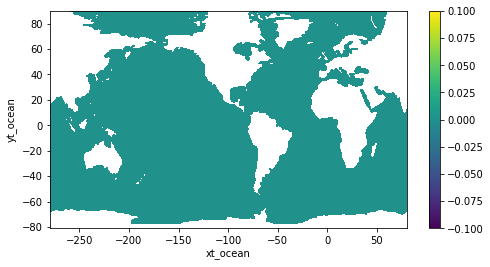

In [3]:
## eta0 is eta_t, eta is sea_level, plot the difference
tmp = eta-eta0

plt.figure(figsize=(8,4))
tmp.plot()

# 2. Compare $P_{bot}$ and $P = \int \rho*g*dz$
## $\rho$ is density in-situ

In [4]:
pb = pbot*10000   ## pbot in Pa

dp = rho*g*dz  ## integrated bottom pressure in Pa
p = dp.sum('st_ocean')   ## pressure using rho in-situ

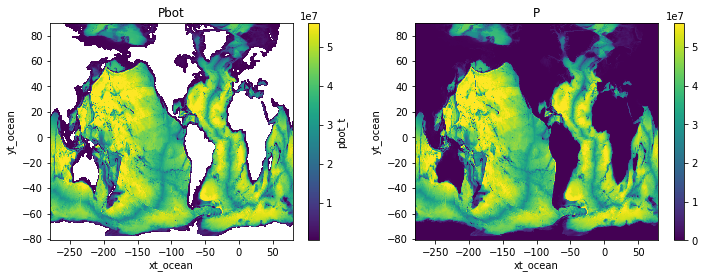

In [5]:
plt.figure(figsize=(12,4))

plt.subplot(121)
pb.plot()
plt.title('Pbot')

plt.subplot(122)
p.plot()
plt.title('P')

### 2.1 Difference between $P_{bot}$ and $P = \int \rho*g*dz$
## $dpb = P_{bot}-\int \rho*g*dz$

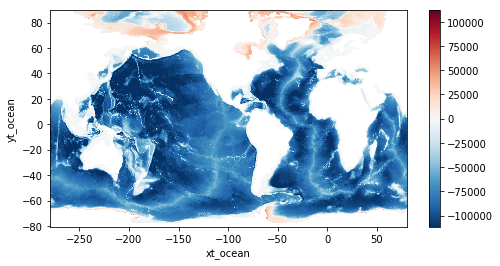

In [6]:
## Difference pressure dpb between pb and p
dpb = pb-p

plt.figure(figsize=(8,4))
dpb.plot()

## C: $P_{bot}$ and $P = \int \rho*g*dz$ are different.